In [54]:
import os,sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import tifffile
import torch
import torch.nn as nn
import re

In [55]:
current_dir = os.getcwd()
data_dir    = os.path.join(current_dir, 'data')
test_dir    = os.path.join(data_dir, 'test')
train_dir   = os.path.join(data_dir, 'train')
label_dir   = os.path.join(data_dir, 'label')

temp_dir = [data_dir,train_dir,test_dir,label_dir]

for dir in temp_dir:
    if not os.path.exists(dir):
        os.makedirs(dir)

# for dirpath, dirnames, filenames in os.walk(data_dir):
#     for filename in filenames:
#         print(os.path.join(dirpath, filename))

In [56]:
test_dir

'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\test'

In [57]:
import glob
pattern_train = train_dir + "\\*.tif"
train_list = glob.glob(pattern_train)
#this test is for  submission
pattern_test = test_dir + "\\*.tif"
test_list = glob.glob(pattern_test)
#we should use train test split to create test data ourselves
pattern_label = label_dir + "\\*.tif"
label_list = glob.glob(pattern_label)

In [58]:
train_list, test_list, train_label, test_label = train_test_split(train_list, label_list, test_size=0.2, random_state= 42, shuffle= True)

In [59]:
len(train_list)

4508

In [60]:
train_label

['c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\BM345228_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\TB354471_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\HX803950_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\PY564619_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\BN423026_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\KX855111_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\UA415743_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\DU412942_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\KN470057_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\IE351236_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TESTING\\kelp\\data\\label\\VP311331_kelp.tif',
 'c:\\Users\\guoyy\\OneDrive\\Desktop\\TEST

some easy presentations

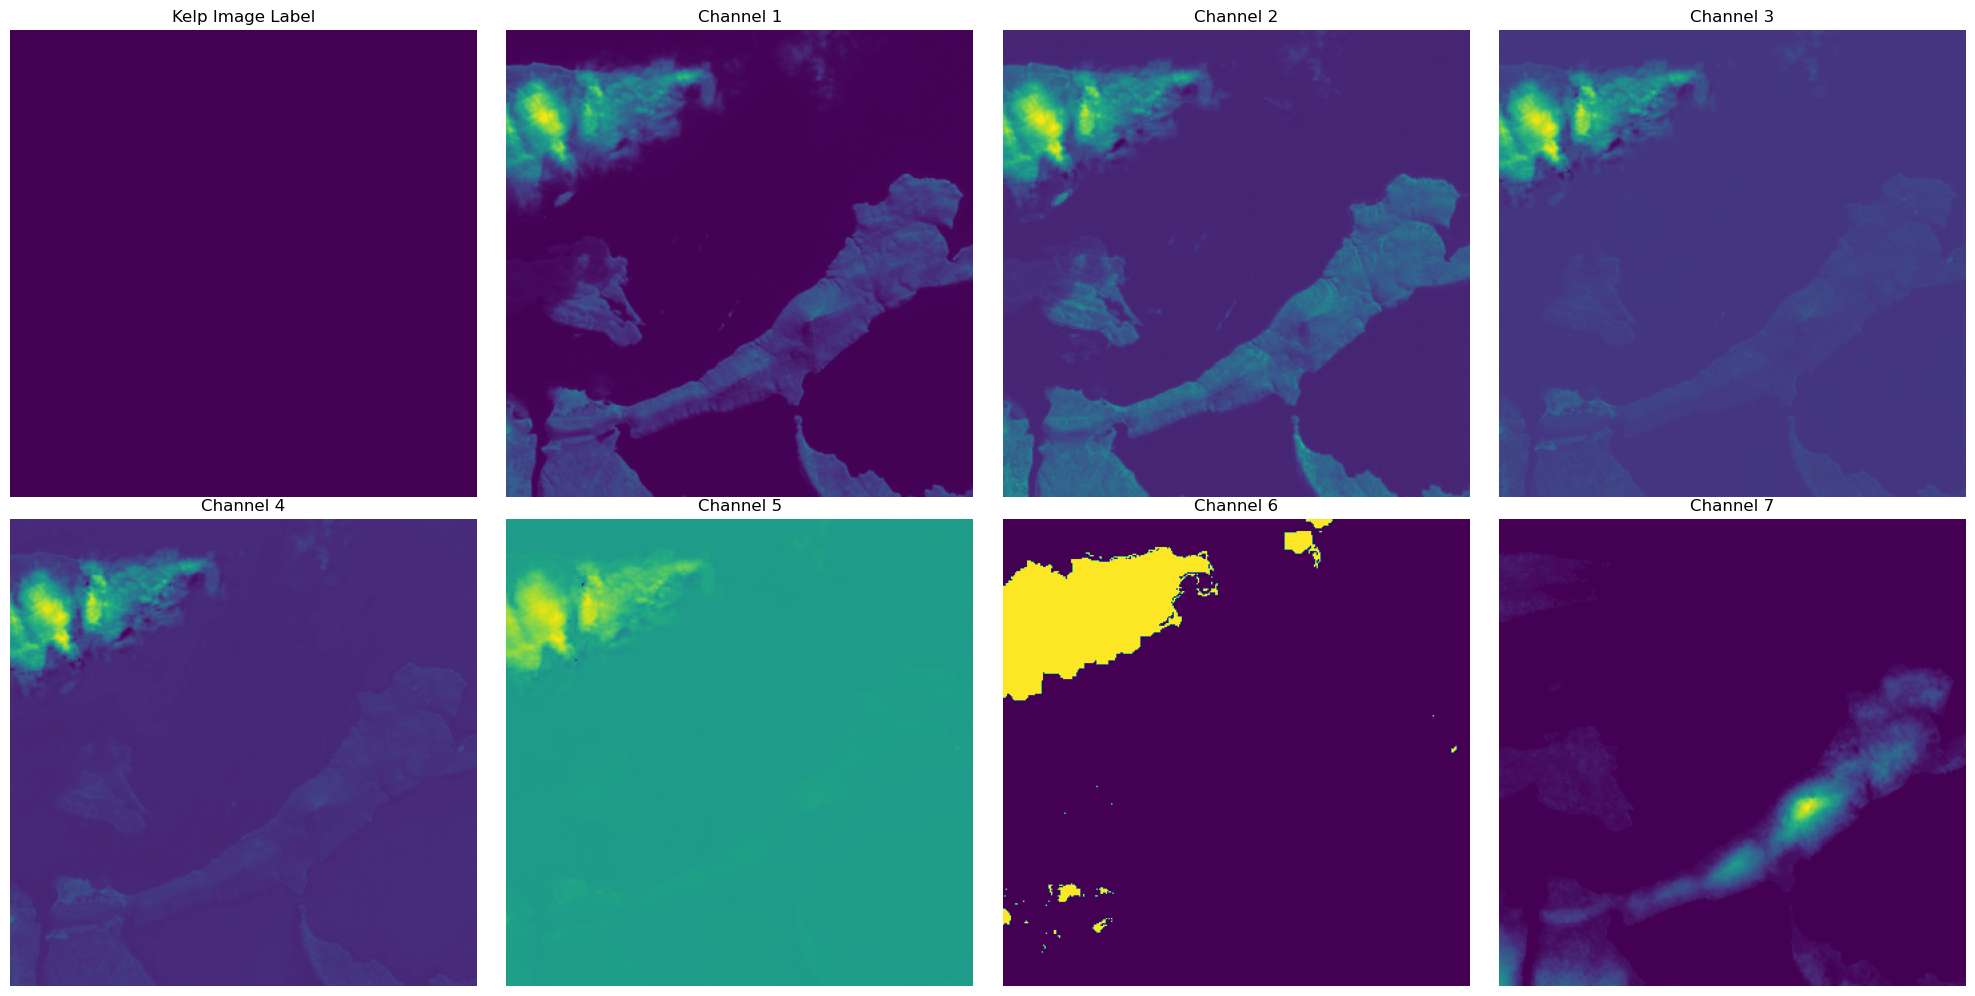

In [61]:
#  randomly print the map in training list
def show_image():
    n = np.random.randint(1,4509)
    with tifffile.TiffFile(train_list[n]) as train_temp:
        train = train_temp.asarray()
    with tifffile.TiffFile(train_label[n]) as label_temp:
        label = label_temp.asarray()

    n_channels = train.shape[2]

    plt.figure(figsize=(20, 10))  # Adjust the size as needed

    # Add the single image as the first subplot
    plt.subplot(2, 4, 1)  # Consider it's placed in a 2x4 grid
    plt.imshow(label)  # Assuming it's grayscale; adjust as needed
    plt.title('Kelp Image Label')
    plt.axis('off')

    # Loop through each channel of the satellite image and add as subsequent subplots
    for i in range(n_channels):
        plt.subplot(2, 4, i + 2)  # Offset by 2 to account for the first kelp image
        plt.imshow(train[:, :, i])  # Display each channel in grayscale
        plt.title(f'Channel {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    
show_image()

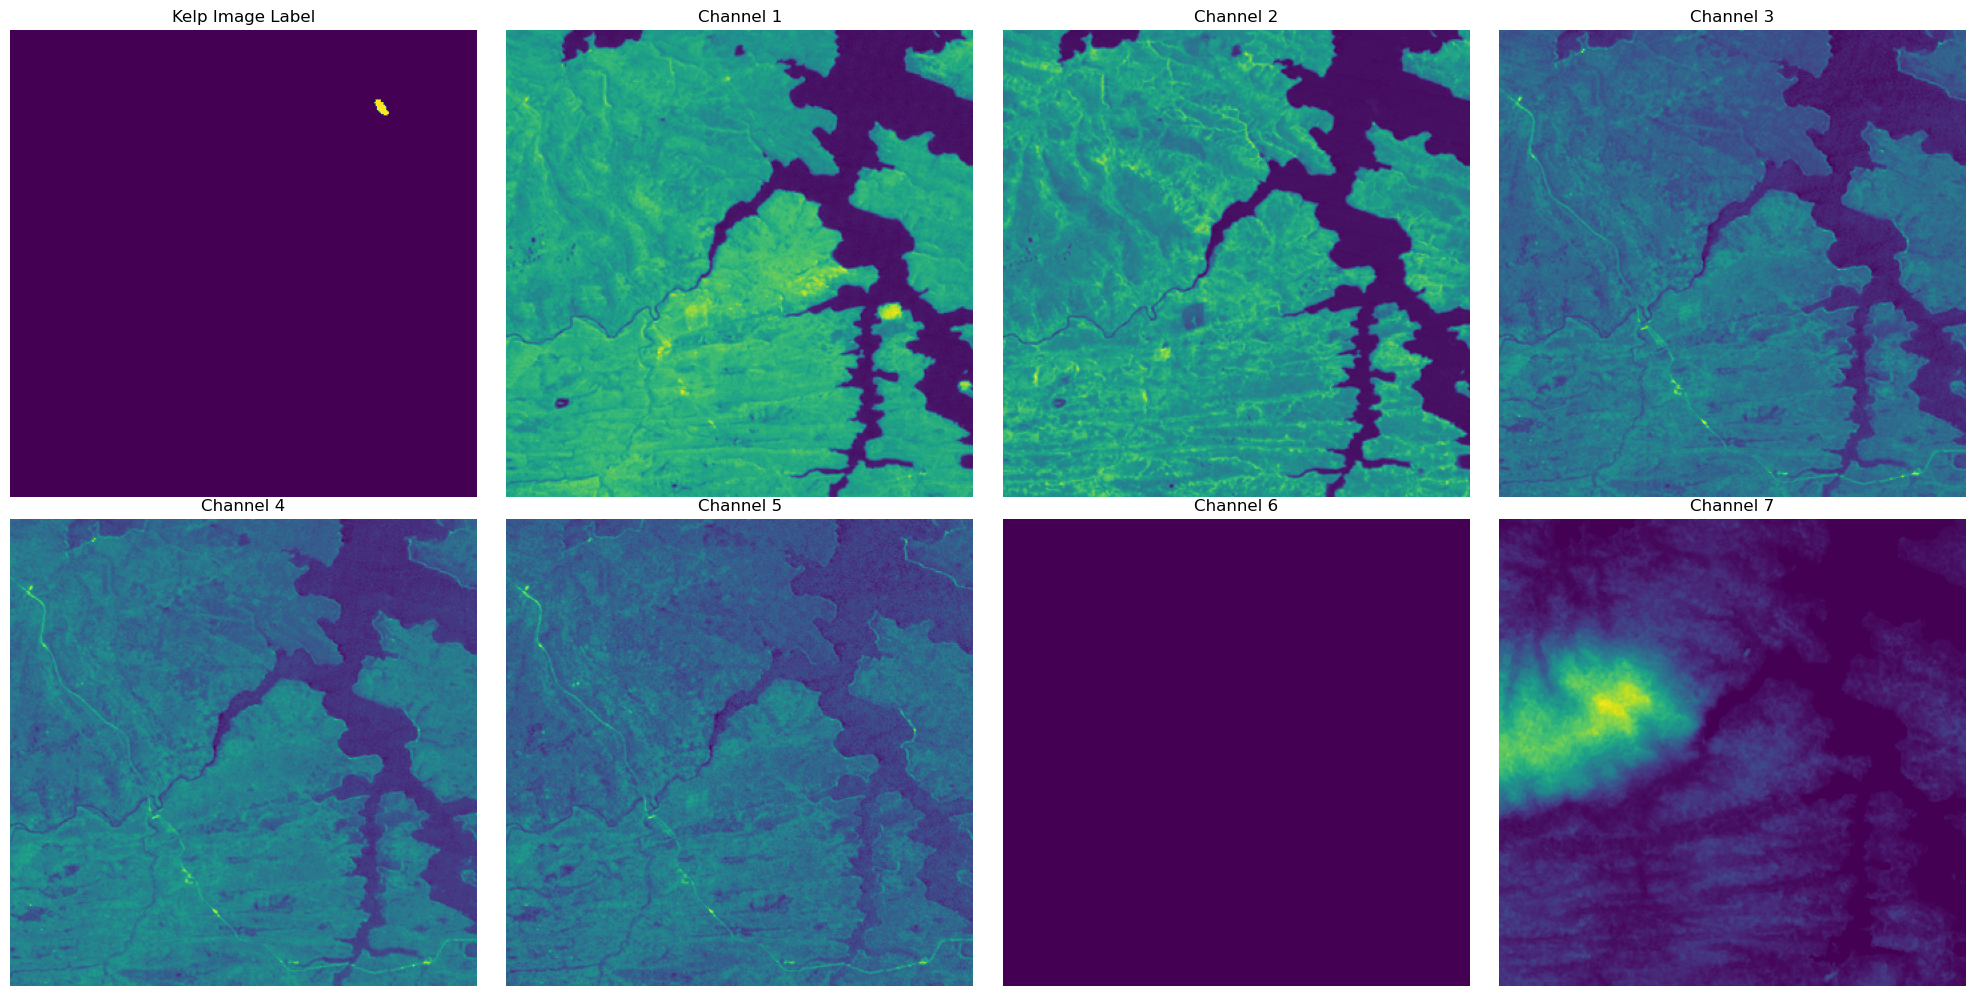

In [62]:
def tensor_transform(list):
    for image in list:
        with tifffile.tifffile(image) as temp:
            temp.asarray




#  randomly print the map in training list
def show_image():
    n = np.random.randint(1,4509)
    with tifffile.TiffFile(train_list[n]) as train_temp:
        train = train_temp.asarray()
    with tifffile.TiffFile(train_label[n]) as label_temp:
        label = label_temp.asarray()

    n_channels = train.shape[2]

    plt.figure(figsize=(20, 10))  # Adjust the size as needed

    # Add the single image as the first subplot
    plt.subplot(2, 4, 1)  # Consider it's placed in a 2x4 grid
    plt.imshow(label)  # Assuming it's grayscale; adjust as needed
    plt.title('Kelp Image Label')
    plt.axis('off')

    # Loop through each channel of the satellite image and add as subsequent subplots
    for i in range(n_channels):
        plt.subplot(2, 4, i + 2)  # Offset by 2 to account for the first kelp image
        plt.imshow(train[:, :, i])  # Display each channel in grayscale
        plt.title(f'Channel {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    
show_image()

In [63]:
for image in train_list:
    with tifffile.TiffFile(image) as temp:
        temp.asarray()
        break

In [64]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device is {device}")

device is cuda


In [65]:
def compare(list1, list2) -> str:
    comparison_list = []
    assert len(list1) == len(list2)
    for i in range(len(list1)):
        cesar = not list1[i].split("\\")[-1].split("_")[0] == list2[i].split("\\")[-1].split("_")[0]
        comparison_list.append(cesar)
    if sum(comparison_list) == 0:
        print(f"these two lists are equal")

In [66]:
compare(train_list, train_label)

these two lists are equal


In [67]:
pattern 
train_list.    train_list[1].split("_")[-1]

NameError: name 'pattern' is not defined

In [ ]:
def name_relation():
    train_list

tensor squeeze 7 + 1 to 8 
import torch

Assuming tensor_a has shape (4, 4, 2) and tensor_b has shape (4, 4, 7)
tensor_a = torch.randn(4, 4, 2)
tensor_b = torch.randn(4, 4, 7)

Concatenate along the last dimension
combined_tensor = torch.cat((tensor_a, tensor_b), dim=-1)  # Resulting shape will be (4, 4, 9)

print(combined_tensor.shape)  # Outputs: torch.Size([4, 4, 9])


In [ ]:
# def transfer_to_tensor():
#     for i in range(len(train_list)):
        
#     for image in train_list:
#         with tifffile.TiffFile(image) as temp:
#             a = torch.tensor(temp.asarray(), dtype=torch.float32)
#     for image in train_label:
#         with tifffile.TiffFile(image) as temp:
#             a = torch.tensor(temp.asarray(), dtype=torch.float32)

# transfer_to_tensor()

tensor([[[ 1.4661e+04,  1.6688e+04,  1.0104e+04,  ...,  8.8960e+03,
           0.0000e+00,  3.6000e+01],
         [ 1.4384e+04,  1.6491e+04,  1.0174e+04,  ...,  8.7540e+03,
           0.0000e+00,  4.1000e+01],
         [ 1.4292e+04,  1.6491e+04,  1.0174e+04,  ...,  8.8260e+03,
           0.0000e+00,  4.1000e+01],
         ...,
         [-3.2768e+04, -3.2768e+04, -3.2768e+04,  ..., -3.2768e+04,
           1.0000e+00,  0.0000e+00],
         [-3.2768e+04, -3.2768e+04, -3.2768e+04,  ..., -3.2768e+04,
           1.0000e+00,  0.0000e+00],
         [-3.2768e+04, -3.2768e+04, -3.2768e+04,  ..., -3.2768e+04,
           1.0000e+00,  0.0000e+00]],

        [[ 1.4847e+04,  1.6393e+04,  9.8230e+03,  ...,  8.8960e+03,
           0.0000e+00,  4.0000e+01],
         [ 1.4847e+04,  1.6491e+04,  9.8940e+03,  ...,  8.7540e+03,
           0.0000e+00,  4.1000e+01],
         [ 1.4384e+04,  1.6491e+04,  9.9640e+03,  ...,  8.7540e+03,
           0.0000e+00,  4.1000e+01],
         ...,
         [-3.2768e+04, -3